In [4]:
# Import necessary packages. 
from popstar import synthetic, evolution, atmospheres, reddening, ifmr
from popstar.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import os
import pylab as py
from astropy.constants import G
from astropy import units as u
import astropy.modeling

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


In [3]:
#From listing 2 in Hosek et al 2020

# First, we'll generate 2 cluster CMDs, one with multiplicity and one without. We'll 
# reuse the merged isochrone (iso_merged) with Cardelli+89 extinction law from Figure 2 
# for the purposes  of the plot (Age = 5 Myr, solar metallicity, A_Ks = 1.0 mag, dist=4000 pc).
# Both clusters will be 10^4 M_sun and a Kroupa+01 IMF

# Fetch isochrone
logAge = 6.70 # Age in log(years)
AKs = 1.0 # Ks filter extinction in mags
dist = 4000 # distance in parsecs
metallicity = 0 # metallicity in [M/H]
atm_func = atmospheres.get_merged_atmosphere
evo_merged = evolution.MISTv1()
redlaw = reddening.RedLawCardelli(3.1) # Rv = 3.1
filt_list = ['nirc2,J', 'nirc2,Kp']

iso_dir = 'iso_merged_r1/'

if not os.path.exists(iso_dir):
        os.mkdir(iso_dir)

iso_merged = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=metallicity,
                                 evo_model=evo_merged, atm_func=atm_func,
                                 filters=filt_list, red_law=redlaw,
                                 iso_dir=iso_dir, mass_sampling=3)

In [4]:
# Now we can make the cluster. 
clust_mtot = 10**8.
clust_multiplicity = multiplicity.MultiplicityUnresolved()

# Multiplicity is defined in the IMF object
clust_imf_noMult = imf.Kroupa_2001(multiplicity=None)
clust_imf_Mult = imf.Kroupa_2001(multiplicity=clust_multiplicity)

In [5]:
# Make clusters
clust_noMult = synthetic.ResolvedCluster(iso_merged, clust_imf_noMult, clust_mtot)
clust_Mult = synthetic.ResolvedCluster(iso_merged, clust_imf_Mult, clust_mtot)

clust_noMult_ss = clust_noMult.star_systems
clust_Mult_ss = clust_Mult.star_systems

Found 109704512 stars out of mass range
Found 73971929 stars out of mass range
Found 10254533 companions out of stellar mass range


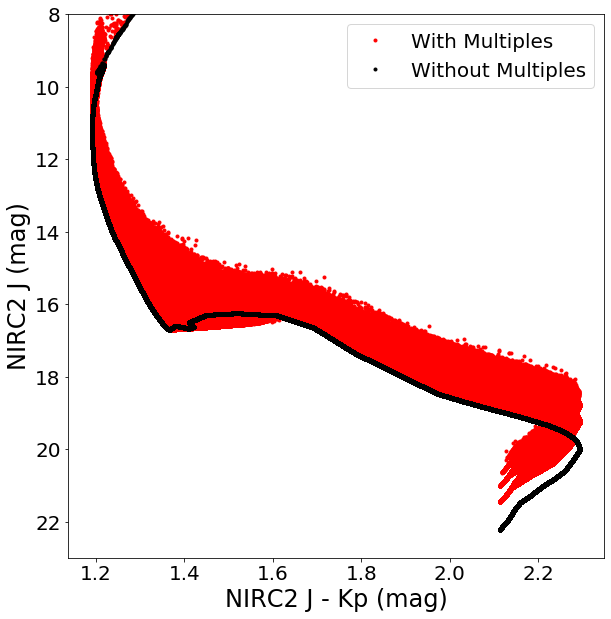

In [6]:
# Now we can make the final cluster figure
py.figure(figsize=(20,10))
py.subplots_adjust(left=0.08)
py.subplot(121)
py.plot(clust_Mult_ss['m_nirc2_J'] - clust_Mult_ss['m_nirc2_Kp'],
       clust_Mult_ss['m_nirc2_J'], 'r.', label='With Multiples')
py.plot(clust_noMult_ss['m_nirc2_J'] - clust_noMult_ss['m_nirc2_Kp'],
       clust_noMult_ss['m_nirc2_J'], 'k.', label='Without Multiples')
py.xlabel('NIRC2 J - Kp (mag)', fontsize=24)
py.ylabel('NIRC2 J (mag)', fontsize=24)
py.tick_params(axis='both', labelsize=20)
py.ylim(23, 8)
py.legend(fontsize=20,loc="upper right")
py.savefig('cluster_cmd.png')

Text(0.5, 0, 'log(System Mass)')

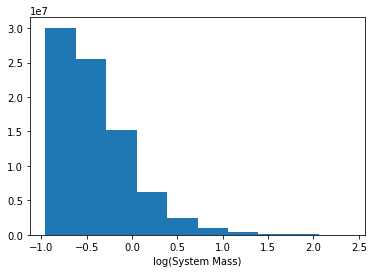

In [7]:
py.hist(np.log10(clust_Mult_ss['systemMass']))
py.xlabel("log(System Mass)")

In [14]:
clust_Mult_ss

mass,isMultiple,systemMass,Teff,L,logg,isWR,mass_current,phase,m_nirc2_J,m_nirc2_Kp,N_companions
float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0.17988353914428054,False,0.17988353914428054,3180.7299498702346,1.8663241002963961e+25,3.9807342517284914,0.0,0.17988353914428054,1.0,21.545576053425684,19.390603830625913,0
0.08287704651380359,False,0.08287704651380359,2970.40807061103,7.866632132171685e+24,3.8886025660483536,0.0,0.08287704651380359,1.0,22.36698092853324,20.260382600106336,0
0.1907334141220658,True,0.37385472701229316,3200.308351738717,2.0079185285768818e+25,3.983754133597308,0.0,0.1907334141220658,1.0,20.816604676780216,18.663288947233397,2
0.8721691499982877,False,0.8721691499982877,4197.460931310775,1.8933275385327615e+26,4.137580088043218,0.0,0.8721691499982877,1.0,19.412460416119757,17.187543861455175,0
0.5022397433077326,False,0.5022397433077326,3723.2010290615226,8.040788990484981e+25,4.06378294465073,0.0,0.504285760955326,1.0,20.191066642041815,17.903345928370793,0
0.8850847246400245,False,0.8850847246400245,4213.743543696215,1.942697617379899e+26,4.139545501575657,0.0,0.8850847246400245,1.0,19.388523190937356,17.168706523523596,0
0.47559643279003366,False,0.47559643279003366,3677.8942219814003,7.361459808432309e+25,4.057117762973475,0.0,0.4772920924010277,1.0,20.27260399699829,17.990372545700858,0
1.0783586093628768,True,1.3556785992472515,4478.168802773534,2.8892176996144136e+26,4.157578398731511,0.0,1.0783586093628768,1.0,18.863884406754934,16.730959283257427,1
0.3029638559584793,False,0.3029638559584793,3384.7510339296723,3.6664054378016335e+25,4.015029879668375,0.0,0.3029638559584793,1.0,20.8982958649988,18.674251459344006,0


In [9]:
VLM = clust_Mult_ss[(clust_Mult_ss['mass'] < 0.1)]
M = clust_Mult_ss[(clust_Mult_ss['mass'] > 0.1) & (clust_Mult_ss['mass'] < 0.5)]
FGK = clust_Mult_ss[(clust_Mult_ss['mass'] > 0.7) & (clust_Mult_ss['mass'] < 1.3)]
A = clust_Mult_ss[(clust_Mult_ss['mass'] > 1.5) & (clust_Mult_ss['mass'] < 5.0)]
Early_B = clust_Mult_ss[(clust_Mult_ss['mass'] > 8.0) & (clust_Mult_ss['mass'] < 16.0)]
O = clust_Mult_ss[(clust_Mult_ss['mass'] > 16.0)]

In [75]:
#Duchene and Krauss MF and CF from table 1
MF = [.22, .26, .44, .50, .60, .80]
MF_uperror = [0.06, 0.03, 0.02, 0.1,0.1,0.1]
MF_lowerror = [0.04, 0.03, 0.02, 0,0,0]
MF_lowlim = np.array([0, 0, 0, 1, 1, 1], dtype=bool)

CF = [.22, .33, .62, 1.00, 1.00, 1.30]
CF_uperror = [0.06, 0.05, 0.03, 0.1,0.2,0.2]
CF_lowerror = [0.04, 0.05, 0.03, 0.1,0.2,0.2]

Text(0, 0.5, 'MF(Blue)/CF(Red)')

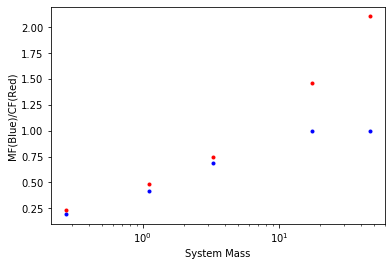

In [49]:
stellar_classes = [VLM,M,FGK,A,Early_B,O]
py.xscale('log')
for i in range(len(stellar_classes)):
    stellar_class = stellar_classes[i]
    py.plot(np.mean(stellar_class['systemMass']),np.mean(stellar_class['isMultiple']),marker='.',color='blue')

for i in range(len(stellar_classes)):
    stellar_class = stellar_classes[i]
    py.plot(np.mean(stellar_class['systemMass']),np.mean(stellar_class['N_companions']),marker='.',color='red')
py.xlabel("System Mass")
py.ylabel("MF(Blue)/CF(Red)")

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0, 0.5, 'MF(Blue)/CF(Red)')

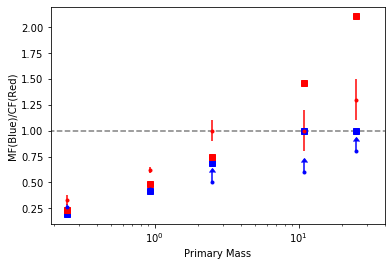

In [82]:
#fig, ax = py.subplots(figsize=(7, 4))
py.xscale('log')
for i in range(len(stellar_classes)):
    stellar_class = stellar_classes[i]
    py.plot(np.mean(stellar_class['mass']),np.mean(stellar_class['isMultiple']),marker='s',color='blue')
    py.errorbar(np.mean(stellar_class['mass']),MF[i],marker='.',color='blue', yerr=np.array([[MF_lowerror[i],MF_uperror[i]]]).T,lolims=MF_lowlim[i])

for i in range(len(stellar_classes)):
    stellar_class = stellar_classes[i]
    py.plot(np.mean(stellar_class['mass']),np.mean(stellar_class['N_companions']),marker='s',color='red')
    py.errorbar(np.mean(stellar_class['mass']),CF[i],marker='.',color='red', yerr=np.array([[CF_lowerror[i],CF_uperror[i]]]).T)

py.hlines(1,0,40,linestyle="dashed",color="grey")
py.xlim(0,40)
    
py.xlabel("Primary Mass")
py.ylabel("MF(Blue)/CF(Red)")

In [57]:
np.array([[MF_lowerror[0],MF_uperror[0]]]).T

array([[0.04],
       [0.06]])

In [36]:
clust_Mult.companions

system_idx,mass,Teff,L,logg,isWR,mass_current,phase,m_nirc2_J,m_nirc2_Kp
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.035301525723652985,nan,nan,nan,nan,nan,nan,nan,nan
0,0.35637952702823994,3472.1023570364146,4.604780309826035e+25,4.029904369932766,0.0,0.35637952702823994,1.0,20.690146301322667,18.441802964113315
2,0.08302746635452433,2970.8854155202043,7.883282052333636e+24,3.888729921513497,0.0,0.08302746635452433,1.0,22.36461933741379,20.257993153307954
3,0.5423757465158096,3772.683610383834,8.941242637157202e+25,4.072489082221013,0.0,0.5423757465158096,1.0,20.09906200554582,17.80704488835322
8,1.5710741557362313,5212.452423768002,8.72454967229779e+26,4.102690788918002,0.0,1.5710741557362313,1.0,18.041017611370737,16.15918529704324
12,0.10415519724818545,3037.0277427682263,9.23367420495534e+24,3.959284231215733,0.0,0.10415519724818545,1.0,22.23688947894009,20.11860237463251
18,0.16850107629076158,3160.190502876094,1.7177792254966617e+25,3.977566132900929,0.0,0.16850107629076158,1.0,21.61862355076203,19.470070296590908
19,0.021730289999831492,nan,nan,nan,nan,nan,nan,nan,nan
23,0.010219993903408865,nan,nan,nan,nan,nan,nan,nan,nan


In [26]:
mass_ratios = [[],[]]
stars = clust_Mult.companions[(np.abs(clust_Mult.companions['phase']) == 1.0)]
stars_idx = set(stars['system_idx'])
length = min([len(clust_Mult_ss), 150000])
for i in range(length):
    if i in stars_idx:
        primary_mass = clust_Mult_ss['mass'][i]
        secondary_mass = np.max(stars[(stars['system_idx'] == i)]['mass'])
        if primary_mass < 1.5:
            print(i)
            mass_ratios[0].append(primary_mass)
            mass_ratios[1].append(secondary_mass/primary_mass)

16
23
28
30
33
37
97
99
101
116
120
139
147
148
153
162
163
165
186
199
208
217
226
231
233
275
278
288
336
340
347
349
351
363
364
401
403
411
452
469
472
483
495
497
502
504
513
534
548
558
559
567
574
587
588
595
600
614
620
629
633
634
635
665
674
678
710
719
728
731
732
737
739
741
746
760
762
763
768
772
805
807
838
846
853
859
864
884
897
909
918
932
942
949
962
966
971
977
978
982
984
988
1006
1013
1016
1017
1026
1027
1029
1037
1040
1053
1056
1059
1068
1070
1087
1095
1105
1120
1129
1131
1138
1139
1140
1183
1197
1199
1212
1214
1224
1227
1229
1232
1252
1257
1271
1280
1284
1293
1301
1319
1325
1327
1333
1335
1346
1367
1371
1379
1385
1408
1418
1426
1437
1444
1450
1451
1464
1477
1479
1521
1528
1543
1557
1572
1593
1596
1597
1604
1607
1611
1629
1630
1635
1641
1669
1673
1691
1698
1717
1719
1736
1737
1748
1749
1751
1755
1756
1766
1774
1793
1800
1801
1810
1813
1829
1836
1843
1846
1860
1863
1864
1865
1875
1879
1886
1893
1903
1913
1918
1923
1928
1933
1944
1964
1970
1979
1981
2012
2013
2017


12760
12771
12775
12794
12800
12820
12841
12843
12855
12863
12864
12875
12880
12892
12895
12911
12915
12933
12942
12947
12966
12968
12972
12982
12985
12995
13003
13015
13016
13018
13027
13030
13036
13056
13059
13066
13085
13091
13098
13103
13108
13123
13126
13127
13129
13132
13142
13146
13147
13151
13168
13171
13176
13180
13198
13205
13214
13219
13225
13229
13251
13259
13264
13265
13268
13273
13275
13279
13284
13285
13290
13296
13299
13311
13357
13365
13367
13427
13433
13437
13460
13461
13465
13472
13483
13486
13501
13503
13516
13520
13534
13542
13560
13566
13569
13571
13593
13602
13604
13615
13621
13625
13642
13649
13665
13666
13668
13670
13680
13681
13685
13693
13704
13707
13721
13724
13726
13730
13741
13742
13745
13748
13767
13773
13775
13777
13789
13799
13808
13812
13820
13825
13839
13841
13843
13844
13846
13856
13860
13861
13865
13871
13877
13886
13887
13889
13890
13891
13897
13900
13927
13931
13948
13952
13957
13958
13983
13987
13989
14013
14022
14031
14033
14041
14043
14056
1406

23395
23403
23407
23409
23426
23427
23429
23430
23438
23439
23451
23453
23467
23475
23487
23494
23503
23506
23512
23517
23523
23527
23528
23529
23534
23547
23554
23557
23564
23567
23571
23572
23574
23580
23586
23592
23595
23596
23604
23609
23610
23625
23634
23644
23654
23656
23657
23680
23685
23698
23701
23703
23724
23737
23747
23755
23757
23769
23772
23777
23791
23799
23802
23811
23819
23827
23829
23843
23845
23849
23859
23860
23872
23886
23901
23903
23905
23911
23914
23933
23943
23953
23954
23955
23965
23966
23980
23983
23988
24007
24019
24021
24025
24030
24031
24039
24040
24042
24047
24052
24055
24058
24061
24064
24066
24074
24089
24102
24106
24110
24128
24140
24144
24151
24162
24166
24172
24173
24180
24197
24201
24205
24212
24213
24219
24225
24229
24230
24239
24243
24260
24261
24266
24268
24277
24279
24281
24306
24312
24335
24339
24342
24349
24366
24367
24370
24393
24396
24399
24400
24416
24440
24448
24450
24458
24459
24470
24481
24483
24489
24518
24538
24549
24556
24561
24563
2456

34383
34397
34406
34410
34411
34431
34437
34453
34456
34461
34464
34465
34484
34485
34490
34494
34496
34502
34510
34511
34525
34537
34539
34547
34553
34558
34561
34571
34579
34582
34589
34602
34605
34619
34624
34637
34638
34642
34660
34673
34675
34679
34688
34692
34708
34719
34724
34732
34740
34775
34777
34778
34786
34804
34808
34817
34836
34842
34846
34868
34875
34879
34889
34890
34891
34894
34898
34900
34901
34911
34915
34916
34934
34938
34941
34945
34956
34964
34978
34991
34995
35006
35012
35014
35016
35054
35064
35067
35071
35085
35100
35116
35121
35136
35152
35163
35181
35182
35187
35189
35200
35204
35206
35207
35210
35211
35213
35227
35229
35235
35242
35249
35264
35273
35277
35291
35294
35295
35319
35328
35330
35338
35340
35343
35344
35367
35371
35373
35385
35389
35396
35401
35406
35409
35423
35426
35429
35432
35434
35441
35443
35448
35469
35480
35481
35490
35498
35502
35503
35511
35513
35523
35527
35536
35547
35550
35555
35572
35590
35597
35600
35611
35632
35644
35645
35651
3566

44929
44947
44951
44976
44977
44980
44983
45009
45014
45016
45017
45019
45026
45029
45033
45039
45047
45050
45074
45079
45098
45111
45117
45128
45129
45130
45138
45150
45166
45173
45177
45180
45184
45185
45210
45224
45225
45233
45234
45235
45236
45238
45240
45245
45276
45280
45295
45300
45302
45321
45323
45342
45343
45345
45350
45360
45379
45394
45408
45412
45413
45430
45438
45440
45454
45475
45477
45494
45496
45499
45507
45537
45539
45548
45550
45565
45570
45571
45572
45577
45579
45585
45586
45587
45593
45605
45606
45610
45618
45621
45626
45628
45630
45648
45663
45672
45673
45676
45678
45689
45692
45695
45701
45712
45713
45732
45733
45740
45747
45757
45758
45765
45778
45792
45795
45804
45816
45835
45851
45852
45854
45861
45874
45880
45932
45950
45971
45972
45982
45985
45990
45995
46001
46003
46011
46018
46028
46029
46035
46066
46074
46078
46081
46094
46095
46101
46106
46110
46112
46118
46128
46141
46147
46177
46182
46185
46196
46203
46220
46223
46227
46241
46242
46243
46259
46272
4627

56347
56355
56369
56372
56377
56378
56390
56392
56403
56405
56407
56412
56435
56440
56459
56469
56482
56489
56491
56492
56498
56505
56514
56519
56541
56546
56550
56554
56561
56563
56564
56565
56576
56593
56595
56604
56618
56619
56621
56626
56627
56632
56643
56650
56653
56657
56668
56672
56676
56683
56700
56702
56714
56715
56728
56739
56742
56744
56755
56767
56776
56789
56798
56802
56815
56827
56830
56838
56853
56854
56871
56872
56917
56923
56925
56932
56938
56943
56950
56952
56961
56964
56967
56977
56982
56988
57001
57009
57033
57034
57046
57057
57062
57073
57075
57078
57086
57087
57088
57093
57104
57111
57118
57127
57146
57166
57188
57201
57203
57207
57225
57227
57231
57244
57254
57257
57261
57270
57272
57276
57277
57283
57296
57303
57309
57329
57338
57344
57356
57358
57380
57388
57396
57403
57408
57424
57432
57440
57451
57463
57465
57468
57469
57486
57489
57498
57502
57505
57510
57525
57543
57549
57552
57557
57562
57563
57564
57583
57599
57609
57614
57622
57641
57642
57652
57655
5769

67052
67053
67061
67066
67067
67072
67074
67081
67092
67104
67111
67114
67115
67119
67131
67144
67149
67151
67158
67162
67163
67170
67174
67178
67185
67192
67195
67199
67220
67224
67228
67250
67251
67260
67268
67269
67279
67280
67281
67296
67316
67323
67324
67339
67346
67354
67370
67371
67376
67382
67384
67393
67394
67397
67418
67427
67428
67432
67438
67440
67452
67460
67468
67475
67506
67525
67532
67533
67553
67562
67565
67597
67610
67630
67638
67664
67670
67679
67684
67692
67695
67701
67705
67712
67715
67719
67721
67727
67733
67736
67755
67756
67779
67783
67800
67810
67836
67837
67853
67861
67871
67895
67921
67927
67945
67965
67967
67986
67992
68014
68022
68026
68041
68049
68055
68056
68085
68088
68098
68101
68132
68138
68144
68158
68162
68165
68172
68173
68176
68180
68182
68185
68218
68219
68225
68235
68252
68260
68272
68273
68278
68290
68300
68303
68343
68347
68352
68356
68358
68363
68365
68369
68372
68374
68381
68383
68398
68418
68427
68440
68445
68454
68467
68484
68486
68492
6849

77911
77922
77945
77971
77972
77974
77979
77987
77994
78009
78010
78066
78067
78070
78076
78089
78111
78114
78116
78124
78137
78161
78169
78199
78212
78230
78232
78266
78270
78276
78280
78283
78288
78292
78294
78302
78309
78315
78321
78328
78335
78341
78345
78354
78367
78374
78382
78410
78413
78418
78426
78431
78467
78470
78490
78491
78496
78501
78504
78511
78526
78527
78542
78543
78549
78550
78551
78553
78555
78556
78567
78570
78579
78610
78612
78619
78620
78621
78628
78640
78655
78664
78683
78685
78706
78711
78717
78720
78730
78731
78735
78738
78745
78749
78762
78764
78779
78781
78792
78805
78822
78834
78841
78869
78871
78872
78875
78882
78884
78900
78902
78904
78909
78921
78934
78938
78940
78941
78957
78975
78977
78981
78982
79002
79004
79033
79056
79061
79069
79075
79095
79099
79101
79108
79119
79120
79141
79142
79150
79157
79180
79182
79183
79187
79189
79193
79202
79215
79219
79224
79227
79231
79236
79240
79251
79277
79281
79288
79289
79299
79303
79314
79315
79337
79339
79343
7935

89664
89688
89694
89702
89708
89717
89718
89727
89736
89739
89740
89788
89795
89806
89809
89810
89831
89841
89843
89852
89856
89859
89873
89887
89891
89896
89919
89926
89928
89935
89938
89960
89966
90003
90033
90069
90079
90093
90099
90100
90102
90108
90136
90148
90154
90155
90169
90174
90175
90176
90186
90194
90207
90219
90230
90239
90245
90255
90257
90267
90270
90272
90287
90288
90291
90292
90294
90303
90305
90308
90309
90337
90340
90342
90345
90354
90365
90369
90374
90379
90392
90394
90403
90406
90409
90421
90422
90431
90432
90438
90453
90456
90457
90459
90460
90470
90491
90492
90504
90508
90515
90518
90520
90524
90527
90528
90541
90543
90545
90546
90547
90562
90565
90567
90581
90583
90585
90587
90589
90596
90602
90603
90611
90619
90635
90637
90639
90646
90652
90663
90669
90674
90722
90725
90727
90732
90733
90734
90745
90747
90777
90789
90795
90803
90804
90807
90813
90814
90820
90826
90841
90856
90857
90863
90867
90896
90904
90908
90922
90932
90933
90937
90940
90952
90954
90955
9096

100465
100482
100483
100487
100493
100508
100517
100520
100524
100534
100536
100551
100552
100565
100571
100577
100581
100589
100591
100602
100605
100608
100611
100615
100623
100644
100656
100661
100662
100663
100671
100676
100677
100685
100690
100699
100719
100770
100784
100795
100809
100821
100838
100843
100849
100870
100878
100879
100882
100884
100885
100900
100914
100920
100930
100936
100945
100951
100961
100970
100973
100976
100990
100992
100996
100999
101006
101022
101023
101026
101028
101039
101041
101052
101065
101066
101080
101084
101088
101101
101104
101108
101112
101122
101124
101130
101140
101142
101147
101149
101150
101154
101155
101157
101171
101178
101181
101185
101186
101191
101202
101227
101234
101248
101250
101262
101273
101277
101278
101282
101288
101300
101320
101321
101322
101324
101333
101343
101366
101369
101381
101384
101385
101386
101398
101405
101413
101419
101429
101443
101454
101458
101463
101480
101483
101484
101500
101512
101514
101544
101545
101551
101568

109962
109965
109970
109988
109990
109993
109999
110010
110015
110020
110027
110029
110037
110038
110046
110058
110075
110077
110120
110122
110123
110128
110131
110135
110147
110152
110158
110172
110174
110175
110190
110202
110216
110221
110240
110241
110246
110255
110263
110269
110270
110272
110278
110291
110296
110314
110316
110319
110340
110344
110353
110355
110363
110365
110368
110369
110370
110376
110383
110395
110397
110398
110410
110417
110437
110450
110458
110461
110466
110477
110490
110494
110506
110523
110530
110538
110546
110559
110574
110584
110597
110607
110609
110621
110657
110666
110671
110673
110674
110678
110697
110711
110713
110716
110718
110724
110731
110734
110735
110749
110756
110768
110771
110773
110776
110780
110800
110801
110802
110816
110817
110826
110834
110860
110869
110873
110875
110889
110892
110899
110901
110903
110906
110908
110910
110931
110947
110957
110959
110968
110971
110972
110980
110998
110999
111008
111015
111032
111042
111045
111063
111072
111092

119124
119127
119128
119131
119132
119137
119145
119146
119147
119151
119153
119155
119157
119165
119174
119192
119195
119206
119207
119208
119212
119223
119236
119237
119244
119250
119252
119260
119275
119276
119277
119280
119287
119291
119301
119310
119321
119323
119326
119337
119339
119340
119343
119344
119345
119350
119354
119356
119360
119366
119368
119369
119379
119383
119398
119410
119412
119420
119428
119430
119444
119451
119457
119470
119476
119478
119483
119487
119512
119528
119538
119543
119561
119570
119572
119577
119580
119583
119587
119596
119601
119603
119606
119613
119615
119621
119627
119628
119639
119647
119656
119659
119663
119666
119673
119684
119688
119694
119695
119696
119700
119723
119734
119741
119744
119753
119767
119772
119785
119796
119812
119824
119830
119840
119861
119863
119876
119879
119888
119892
119893
119901
119907
119908
119909
119914
119920
119934
119938
119943
119948
119956
119957
119967
119971
119974
119975
119977
119978
119989
119991
120024
120028

128120
128122
128143
128150
128171
128174
128177
128202
128203
128216
128217
128218
128228
128233
128237
128247
128262
128273
128277
128280
128291
128292
128312
128330
128337
128338
128356
128362
128373
128374
128375
128382
128383
128399
128400
128406
128409
128411
128414
128421
128423
128424
128432
128435
128440
128444
128453
128460
128461
128465
128466
128468
128479
128485
128486
128493
128498
128503
128515
128517
128525
128541
128553
128559
128566
128567
128575
128586
128589
128591
128595
128602
128618
128622
128623
128637
128686
128687
128695
128696
128707
128708
128709
128711
128726
128729
128733
128752
128763
128767
128776
128781
128784
128786
128787
128789
128790
128792
128798
128807
128828
128839
128840
128853
128861
128863
128875
128878
128879
128902
128913
128943
128945
128947
128954
128958
128962
128965
128977
128978
128980
128994
128995
129004
129009
129022
129031
129038
129047
129049
129054
129075
129079
129087
129088
129090
129114
129116
129127
129129
129136
129140
129142

137465
137472
137478
137480
137488
137493
137494
137499
137502
137509
137524
137529
137538
137558
137563
137564
137570
137578
137582
137584
137587
137590
137591
137594
137596
137607
137630
137635
137638
137640
137645
137647
137652
137654
137664
137671
137675
137683
137687
137696
137702
137703
137737
137742
137745
137768
137807
137809
137812
137814
137845
137863
137867
137877
137879
137883
137895
137896
137916
137920
137937
137939
137949
137956
137962
137977
137989
137995
138002
138016
138020
138024
138041
138045
138051
138057
138059
138070
138082
138087
138088
138095
138103
138114
138117
138118
138126
138127
138135
138146
138147
138151
138153
138154
138157
138163
138173
138175
138183
138207
138210
138215
138226
138231
138253
138258
138266
138269
138272
138301
138305
138309
138311
138314
138315
138318
138320
138324
138336
138343
138344
138368
138389
138390
138392
138393
138401
138403
138405
138424
138426
138427
138429
138475
138506
138514
138520
138525
138529
138530
138539
138544
138557

146272
146288
146289
146291
146298
146302
146316
146318
146320
146331
146334
146336
146337
146345
146346
146355
146356
146359
146396
146401
146410
146413
146415
146427
146438
146447
146453
146464
146466
146468
146478
146484
146487
146494
146503
146510
146515
146528
146534
146538
146566
146567
146570
146571
146575
146580
146582
146585
146587
146597
146599
146614
146637
146640
146642
146644
146645
146687
146688
146690
146698
146704
146729
146738
146742
146744
146749
146760
146767
146768
146775
146780
146785
146795
146796
146799
146824
146835
146844
146867
146882
146887
146889
146890
146903
146913
146929
146939
146942
146951
146963
146964
146977
146978
146992
146994
146995
147004
147025
147029
147032
147047
147049
147069
147070
147094
147099
147112
147117
147122
147126
147127
147128
147134
147140
147149
147167
147169
147171
147183
147196
147198
147209
147219
147222
147225
147236
147260
147309
147312
147323
147326
147330
147331
147343
147360
147363
147364
147379
147383
147388
147396
147406

155161
155164
155167
155168
155176
155183
155186
155194
155198
155200
155202
155210
155213
155215
155216
155229
155253
155258
155266
155274
155283
155288
155290
155305
155326
155342
155343
155344
155357
155358
155360
155361
155372
155373
155392
155395
155403
155413
155414
155417
155418
155428
155433
155446
155463
155473
155482
155486
155489
155498
155508
155527
155535
155538
155548
155556
155570
155590
155601
155608
155609
155625
155629
155631
155634
155645
155658
155669
155675
155679
155689
155713
155734
155739
155764
155776
155779
155782
155789
155804
155815
155818
155830
155835
155841
155854
155855
155864
155880
155882
155885
155890
155891
155913
155917
155920
155927
155937
155944
155948
155961
155969
155984
156010
156021
156024
156030
156033
156045
156047
156052
156058
156076
156097
156109
156119
156121
156124
156125
156133
156136
156137
156138
156151
156162
156166
156167
156174
156197
156208
156225
156226
156249
156257
156267
156268
156269
156295
156318
156346
156347
156354
156358

KeyboardInterrupt: 

Text(0, 0.5, 'q (Secondary Mass/Primary Mass)')

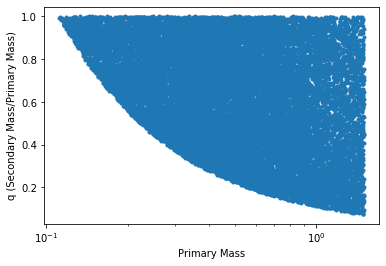

In [33]:
py.plot(mass_ratios[0],mass_ratios[1],linestyle='none',marker='.')
py.xscale('log')
py.xlabel("Primary Mass")
py.ylabel("q (Secondary Mass/Primary Mass)")

In [5]:
#Changing standard deviation from period to semimajor axis
G_units = G.to("AU3/(M_sun*day2)")

def P_to_a(avg_mass, avg_period):
    avg_a = (avg_period**2*G_units*avg_mass/4/np.pi**2)**(1/3)
    return avg_a
    
def a_to_P(avg_mass, avg_a):
    avg_period = (avg_a**3*4*np.pi**2/G_units/avg_mass)**(1/2)
    return avg_period

def std_P_to_a(std_period,avg_mass,avg_period):
    std_a = (2/3)*std_period
    return std_a

In [6]:
#Averge semimajor axis Duchene and Krauss:
avg_a = np.array([4.5, 5.3, 45, 350, P_to_a(30*u.M_sun,5*u.day).value])
std_period = np.array([0.5, 1.3, 2.3, 0, 0])
avg_M = np.array([0.15, 0.5, 1.5, 5, 30])
avg_period = a_to_P(avg_M,avg_a)*u.AU**(3/2)/u.M_sun**(1/2) #units here fixed since G has units, but numpy arrays dont
std_a = std_P_to_a(std_period, avg_M, avg_period)

Text(0, 0.5, 'Average Semimajor Axis (AU)')

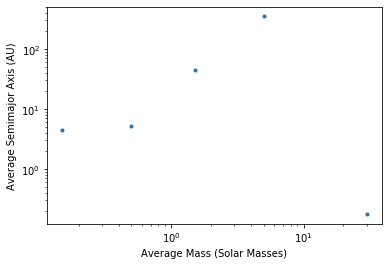

In [7]:
#a vs M without fit

py.plot(avg_M, avg_a, marker='.',linestyle='none')
py.xscale('log')
py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("Average Semimajor Axis (AU)")

<BrokenPowerLaw1D(amplitude=379.79953034, x_break=4.90441533, alpha_1=-1.80171539, alpha_2=4.23325571)>

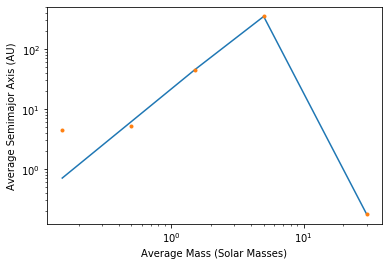

In [8]:
#a vs M with fit

a_fit_init = astropy.modeling.powerlaws.BrokenPowerLaw1D(amplitude=450, x_break=2.5, alpha_1=-2, alpha_2=3.5)
a_fit_init = astropy.modeling.powerlaws.BrokenPowerLaw1D(amplitude=450, x_break=5, alpha_1=-2, alpha_2=3.5)

fit_a = astropy.modeling.fitting.LevMarLSQFitter()
fitted_a = fit_a(a_fit_init, avg_M[:], avg_a[:])

py.plot(avg_M[:], fitted_a(avg_M[:]))
#py.plot(avg_M[:], a_fit_init(avg_M[:]))
py.plot(avg_M, avg_a, marker='.',linestyle='none')
py.xscale('log')
py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("Average Semimajor Axis (AU)")
fitted_a

Text(0, 0.5, 'Average Period (days)')

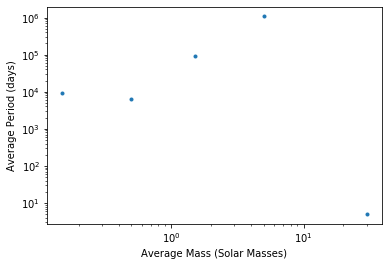

In [9]:
#P vs M

py.plot(avg_M, avg_period, marker='.',linestyle='none')
py.xscale('log')
py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("Average Period (days)")

Text(0, 0.5, 'log(Period) Standard Deviation')

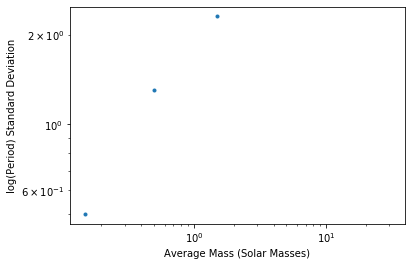

In [10]:
#sigma_log(P) vs M without fitting and with sigma_log(P) for type A and O being zero

py.plot(avg_M, std_period, marker='.',linestyle='none')
py.xscale('log')
py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("log(Period) Standard Deviation")

Text(0, 0.5, 'log(Semimajor Axis) Standard Deviation')

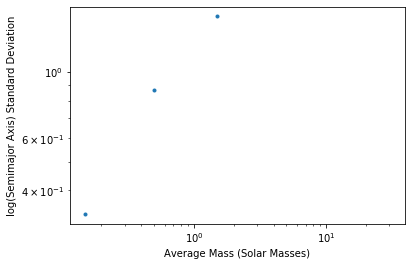

In [11]:
#sigma_log(a) vs M without fitting and with sigma_log(a) for type A and O being zero

py.plot(avg_M, std_a, marker='.',linestyle='none')
py.xscale('log')
py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("log(Semimajor Axis) Standard Deviation")

<Linear1D(slope=1.19713084, intercept=1.28974264)>

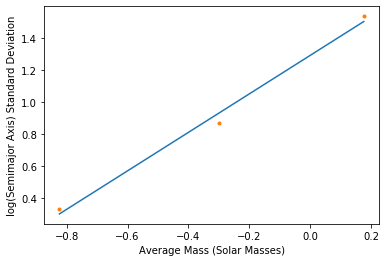

In [32]:
#Plotting sigma_log(a) vs M

std_a_init = astropy.modeling.models.Linear1D()
std_a_fit = astropy.modeling.fitting.LinearLSQFitter()
std_a_fitted = std_a_fit(std_a_init, np.log10(avg_M[0:3]),std_a[0:3])
#std_a_fitted = std_a_fit(std_a_init, avg_M[0:3],std_a[0:3])

py.plot(np.log10(avg_M[0:3]), std_a_fitted(np.log10(avg_M[0:3])))
py.plot(np.log10(avg_M[0:3]), std_a[0:3], marker='.',linestyle='none')
#py.xscale('log')
#py.yscale('log')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("log(Semimajor Axis) Standard Deviation")
std_a_fitted

<Linear1D(slope=0.83984154, intercept=0.30922467)>

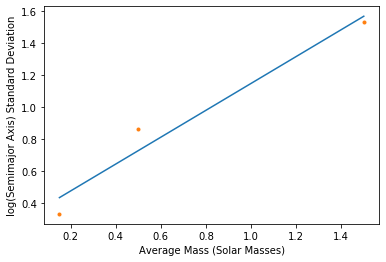

In [13]:
#Linear Scale sigma_log(a) vs M

py.plot(avg_M[0:3], std_a_fitted(avg_M[0:3]))
py.plot(avg_M[0:3], std_a[0:3], marker='.',linestyle='none')
py.xlabel("Average Mass (Solar Masses)")
py.ylabel("log(Semimajor Axis) Standard Deviation")
std_a_fitted

In [36]:
np.log10(fitted_a(13))

0.7873797477504295

In [38]:
std_a_fitted(np.log10(2.9))

1.8432935383672322

In [29]:
std_a

array([0.33333333, 0.86666667, 1.53333333, 0.        , 0.        ])

In [30]:
avg_M

array([ 0.15,  0.5 ,  1.5 ,  5.  , 30.  ])